# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Next task: build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**
  
    To determine whether a video contains a claim or offers an opinion based on user reports  
    This is bynary classification problem. We will use: accuracy, precision, recall and f1 score metrices
    To visualize score we will use confusion matrix

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

    Violation of the rule is not good issue. If this case will be detected in the future and its authors will be banned it will be OK. If model can restrict rules violence irt is definitely worth a try

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

    This case is worth as the author who will be banned without reson will complain and may find alternative service to use instead in the future

3.   **How would you proceed?**

    we will build random forest model and focus on the f1 score as this metric combine both precision and recall metrics

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [4]:
# Drop rows with missing values
data1 = data.dropna(axis=0)

In [12]:

# Display first few rows after handling missing values
data1.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [14]:
# Check for duplicates
data1.duplicated().unique()

array([False])

Check for and handle outliers.

In [4]:
def plot_boxplot(data, column_name:str, fliersize=2):
    plt.figure(figsize=(6,2))
    sns.boxplot(data=None, x=data[column_name], fliersize=fliersize)
    plt.title(f"Boxplot for {column_name} variable")
    plt.show(); 

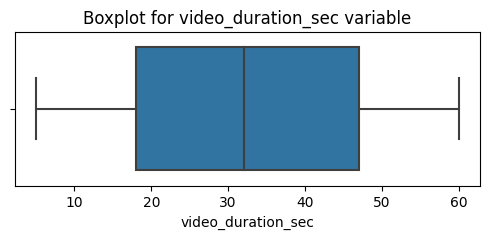

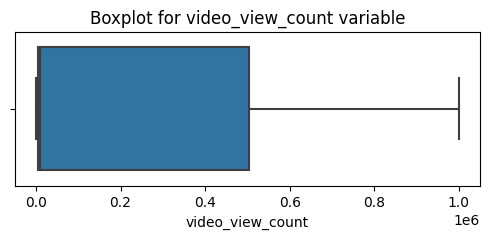

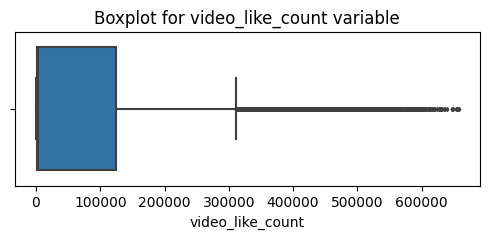

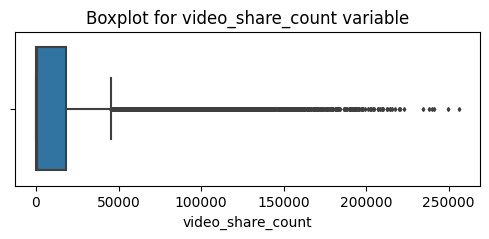

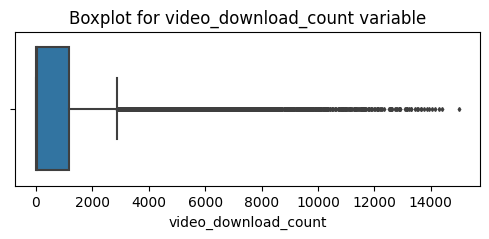

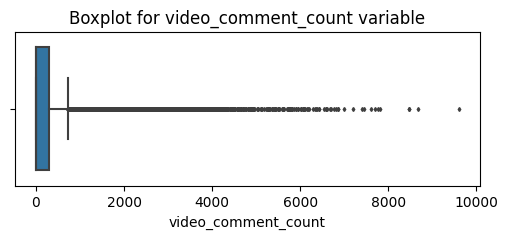

In [5]:
colums_to_check = ["video_duration_sec", "video_view_count", "video_like_count",
                   "video_share_count","video_download_count", "video_comment_count"]
for column in colums_to_check:
    plot_boxplot(data1, column)

In [5]:
def change_outliers(data, column_name:str):
    """
    Define upper limits ( quantile(75%) + 1.5IQR)
    Reassign all outliers which greater than upper limit
    as equal to defined upper limit

    data - pandas dataframe with data to check
    column_name - name of the target column
    """
    # Define IQR value
    percentage_25 = data[column_name].quantile(0.25)
    percentage_75 = data[column_name].quantile(0.75)
    iqr = percentage_75 - percentage_25

    # Define upper limit
    upper_limit = percentage_75 + 1.5 * iqr

    # reassigng outliers to upper limit
    data.loc[data[column_name] > upper_limit, column_name] = upper_limit

    # return updated dataframe
    return data[column_name]

In [6]:
# target columns
colums_to_change = ["video_like_count", "video_share_count","video_download_count", "video_comment_count"]

#  create new dataset and reassign outliers' values
data1 = data1.copy()
for column in colums_to_change:
    data1[column] = change_outliers(data1, column)

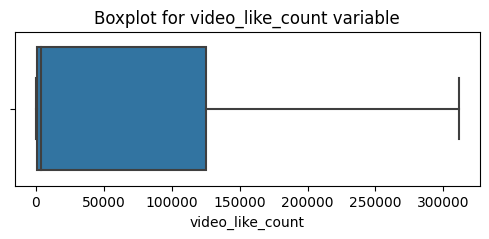

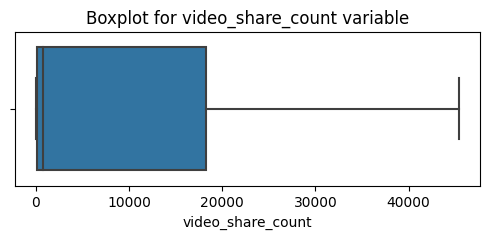

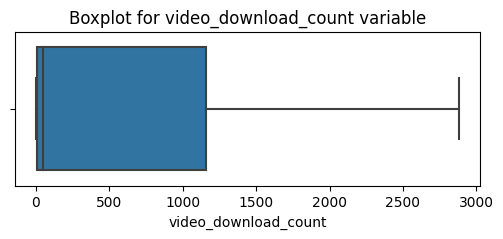

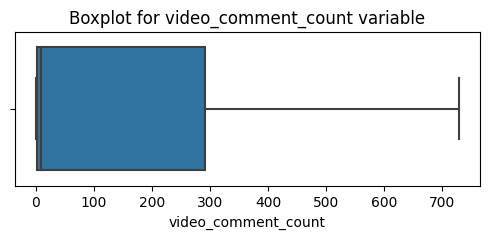

In [8]:
# Check with boxplot that there are no outliers left
for column in colums_to_change:
    plot_boxplot(data1, column)

Check class balance.

In [9]:
# Check class balance
data1["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [7]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data1 = data1.copy()
data1.loc[:,"text_len"] = data1["video_transcription_text"].map(lambda x: len(x))

Calculate the average text_length for claims and opinions.

In [31]:
# Display first few rows of dataframe after adding new column
data1.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.000,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.000,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.000,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.000,34812.0,1234.000,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.000,152.0,128
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.000,45382.5,2880.125,728.5,127
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,311333.875,45382.5,2880.125,728.5,95
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.000,50.0,22.000,11.0,99
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.000,1050.0,53.000,27.0,103
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.000,45382.5,2880.125,728.5,102


Visualize the distribution of `text_length` for claims and opinions.

In [142]:
data1[['claim_status', 'text_len']].groupby('claim_status').mean()

,text_len
claim_status,
claim,95.376978
opinion,82.722562


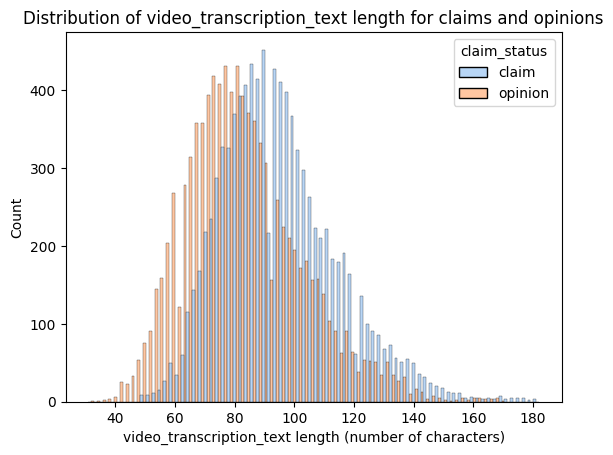

In [143]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data1, stat="count", multiple="dodge", x="text_len",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

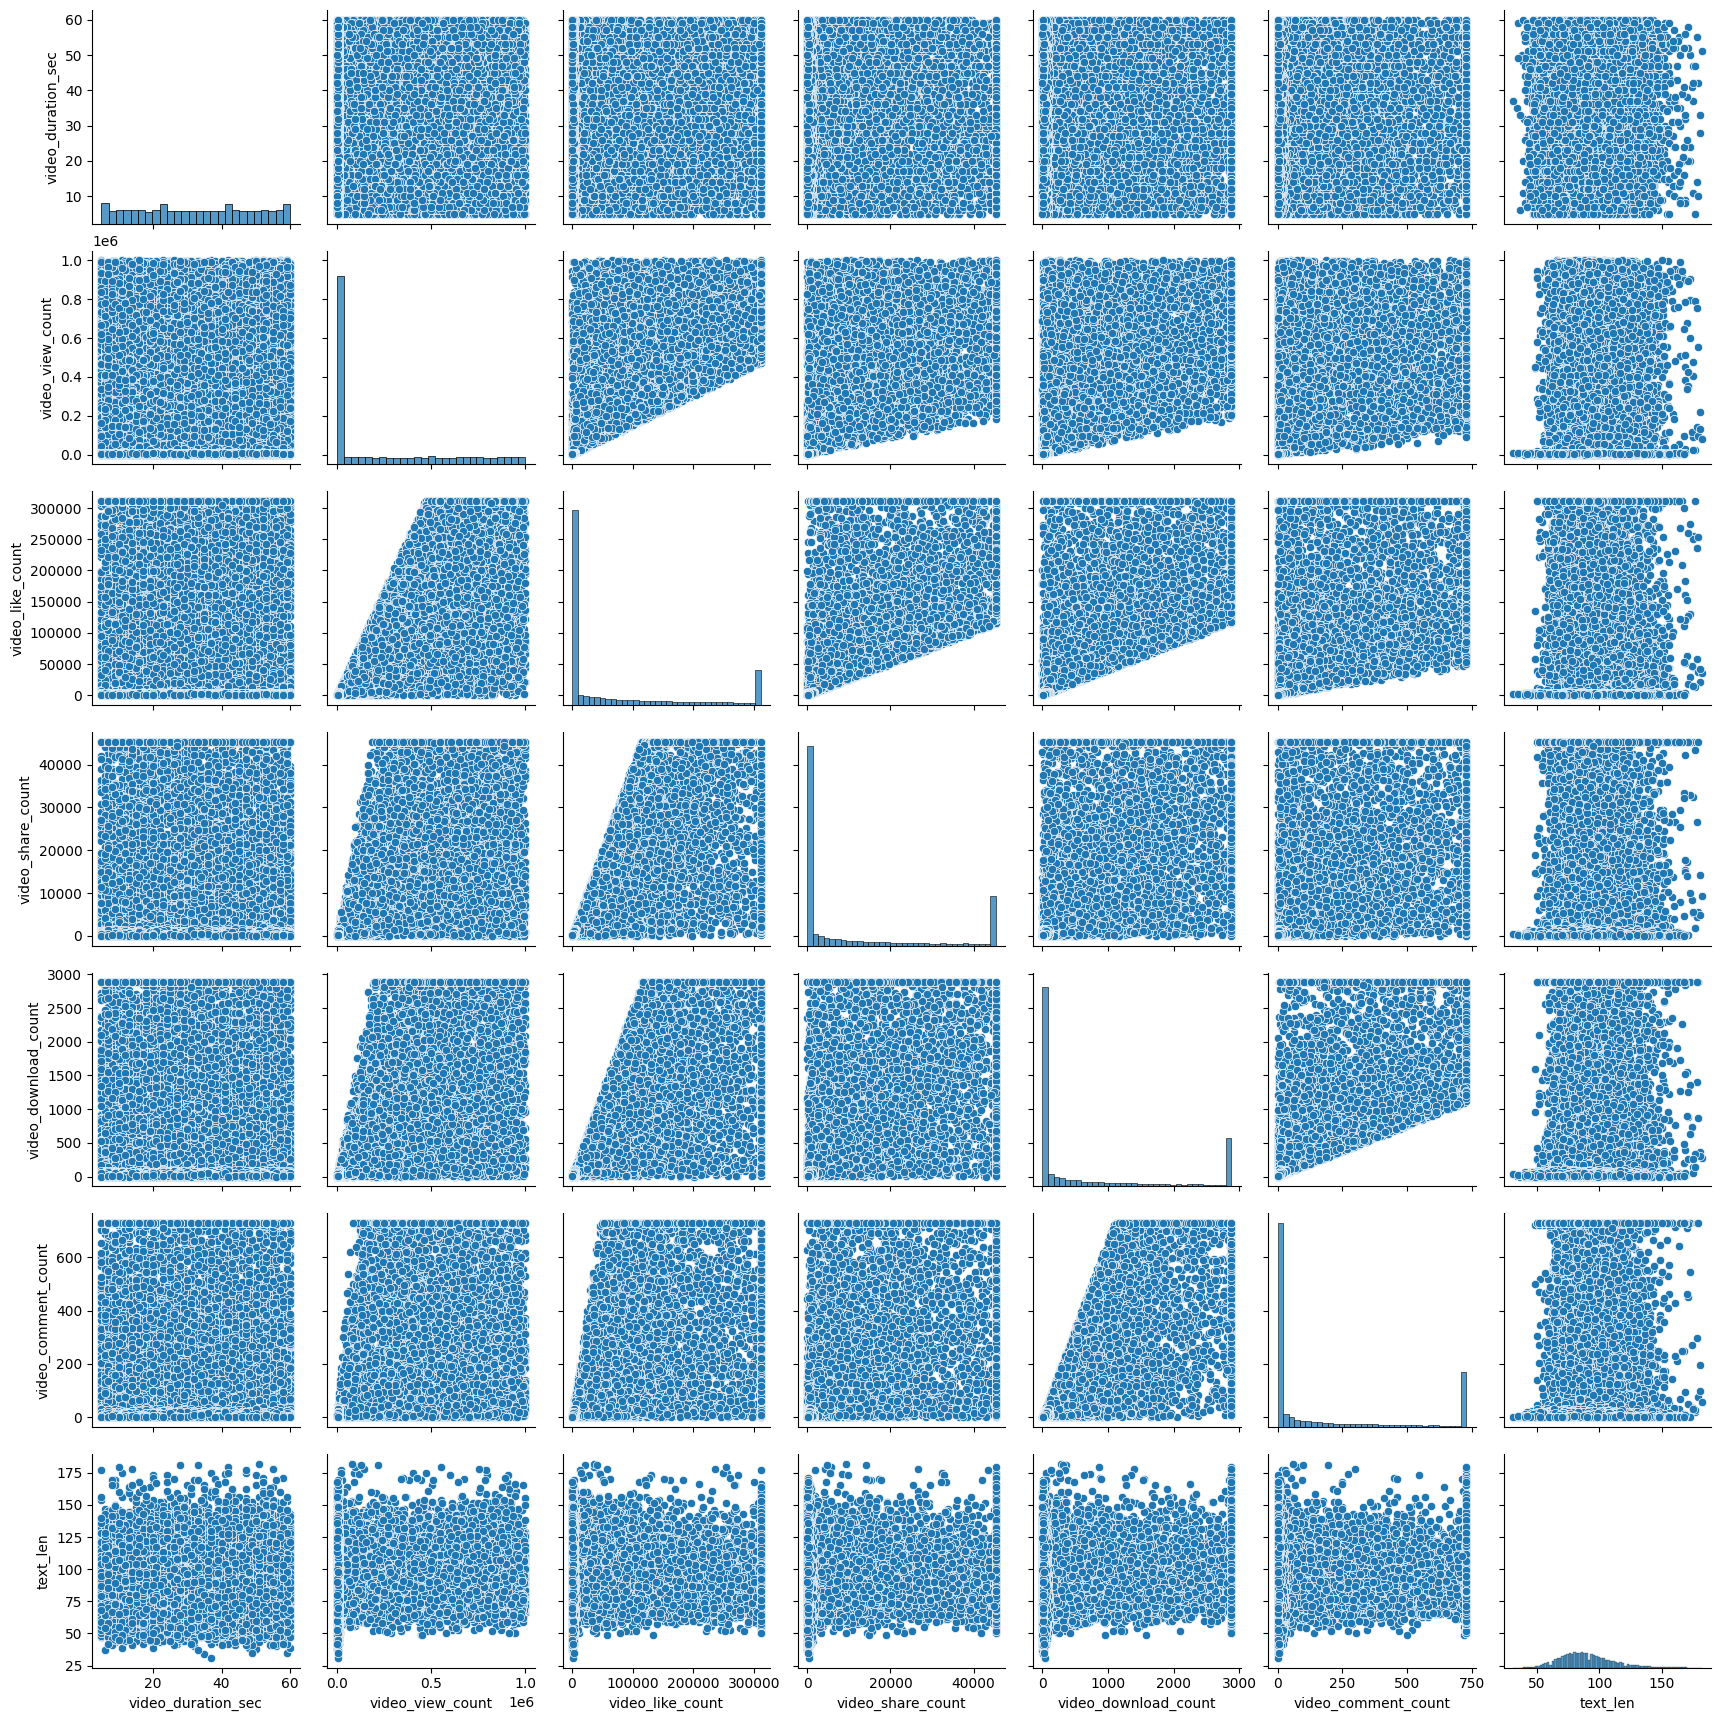

In [9]:
# Create a heatmap to visualize how correlated variables are
variables_correlation_check = ["video_duration_sec", "video_view_count", "video_like_count", "video_share_count", "video_download_count",
                               "video_comment_count", "text_len"]
sns.pairplot(data1[variables_correlation_check])

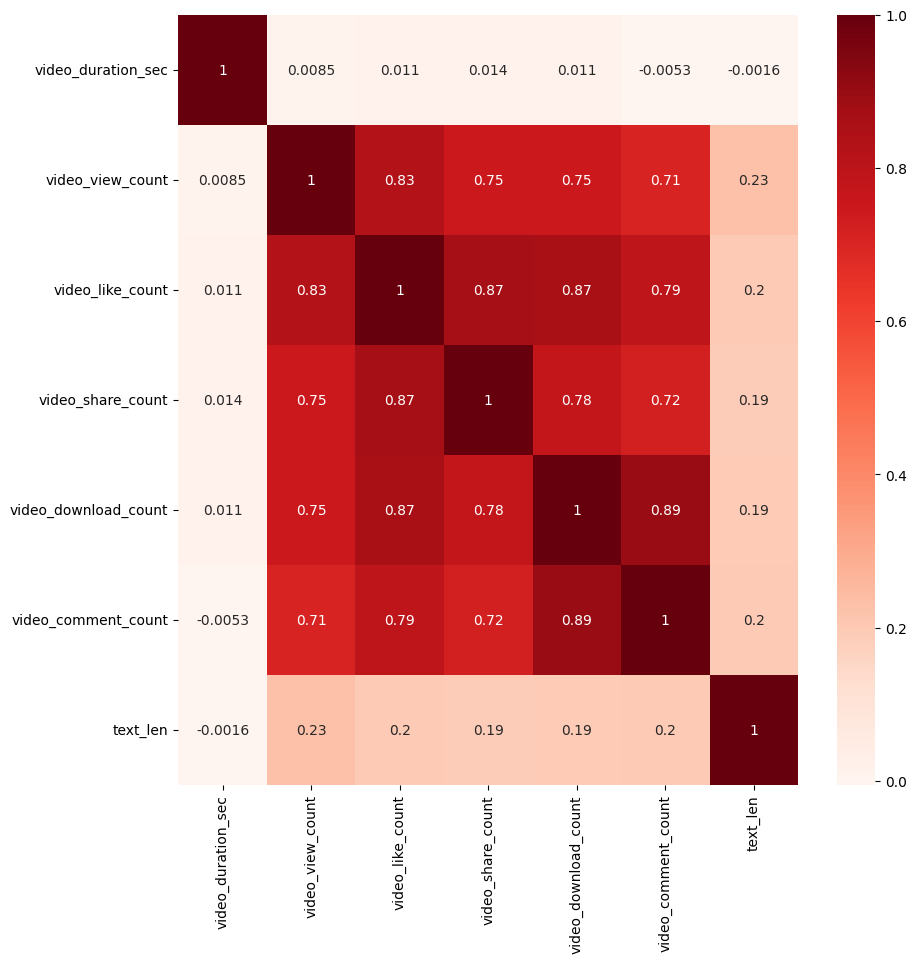

In [10]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data1[variables_correlation_check].corr(method='pearson'), annot=True, cmap = 'Reds');

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

    We can choose one of the five features: ["video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"] as they have strong correlation between each other

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

Select the outcome variable.

In [31]:
data1.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_len                      int64
dtype: object

In [145]:
# Select outcome variable
feature_to_choose = ["claim_status", "video_duration_sec", "verified_status", "author_ban_status", "video_view_count",
                     "video_like_count","video_share_count", "video_download_count", "video_comment_count", "text_len"]

data2 = data1[feature_to_choose]

**Feature selection and transformation**

Encode target and catgorical variables.

In [146]:
# One-hot encode requiret features
data2 = data2.copy()
data2 = pd.get_dummies(data2, columns=["verified_status", "author_ban_status"])
data2.head(10)

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,claim,59,343296.0,19425.000,241.0,1.000,0.0,97,True,False,False,False,True
1,claim,32,140877.0,77355.000,19034.0,1161.000,684.0,107,True,False,True,False,False
2,claim,31,902185.0,97690.000,2858.0,833.000,329.0,137,True,False,True,False,False
3,claim,25,437506.0,239954.000,34812.0,1234.000,584.0,131,True,False,True,False,False
4,claim,19,56167.0,34987.000,4110.0,547.000,152.0,128,True,False,True,False,False
5,claim,35,336647.0,175546.000,45382.5,2880.125,728.5,127,True,False,False,False,True
6,claim,16,750345.0,311333.875,45382.5,2880.125,728.5,95,True,False,True,False,False
7,claim,41,547532.0,1072.000,50.0,22.000,11.0,99,True,False,True,False,False
8,claim,50,24819.0,10160.000,1050.0,53.000,27.0,103,True,False,True,False,False
9,claim,45,931587.0,171051.000,45382.5,2880.125,728.5,102,False,True,True,False,False


### **Task 4. Split the data**


Assign target variable.

In [147]:
y = data2["claim_status"].map(lambda x: 1 if x == "claim" else 0)
y

0        1
1        1
2        1
3        1
4        1
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: claim_status, Length: 19084, dtype: int64

Isolate the features.

In [148]:
#Isolate features
X = data2.drop(["claim_status"], axis=1)

# Display first few rows of features dataframe
X.head(10)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.000,241.0,1.000,0.0,97,True,False,False,False,True
1,32,140877.0,77355.000,19034.0,1161.000,684.0,107,True,False,True,False,False
2,31,902185.0,97690.000,2858.0,833.000,329.0,137,True,False,True,False,False
3,25,437506.0,239954.000,34812.0,1234.000,584.0,131,True,False,True,False,False
4,19,56167.0,34987.000,4110.0,547.000,152.0,128,True,False,True,False,False
5,35,336647.0,175546.000,45382.5,2880.125,728.5,127,True,False,False,False,True
6,16,750345.0,311333.875,45382.5,2880.125,728.5,95,True,False,True,False,False
7,41,547532.0,1072.000,50.0,22.000,11.0,99,True,False,True,False,False
8,50,24819.0,10160.000,1050.0,53.000,27.0,103,True,False,True,False,False
9,45,931587.0,171051.000,45382.5,2880.125,728.5,102,False,True,True,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [150]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [151]:
print(f"Train set size: {(X_tr.shape[0] / X.shape[0])*100:.1f}%")
print(f"Validation set size: {(X_val.shape[0] / X.shape[0])*100:.1f}%")
print(f"Test set size: {(X_test.shape[0] / X.shape[0])*100:.1f}%")

Train set size: 60.0%
Validation set size: 20.0%
Test set size: 20.0%


In [152]:
index_val_set = [0 if x in X_val.index else -1 for x in X_train.index]
# set(index_val_set)
custom_split = PredefinedSplit(index_val_set)

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [56]:
X.dtypes

video_duration_sec                  int64
video_like_count                  float64
text_len                            int64
verified_status_not verified         bool
verified_status_verified             bool
author_ban_status_active             bool
author_ban_status_banned             bool
author_ban_status_under review       bool
dtype: object

In [155]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" : [2,5,10,50],
             "max_features" : [4,6,7,8],
             "min_samples_split" : [0.001, 0.01],
             "n_estimators" : [50, 75, 100, 125, 150]}

# Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, n_jobs=-1, refit="recall")

In [156]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50],
                         'max_features': [4, 6, 7, 8],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [157]:
path = "d:/Python/Coursera_Data_Science_Google/"
with open(path + "rf1_scenario_2.pickle", "wb") as to_write:
    pickle.dump(rf1, to_write)

# with open(path + "rf1_scenario_2.pickle", "rb") as to_load:
#     pickle.load(rf1, to_load)

In [159]:
# Examine best recall score
rf1.best_score_

0.9927159209157128

In [160]:
# Get all the results from the CV and put them in a df
cv_result = pd.DataFrame(rf1.cv_results_)

# Isolate the row of the df with the max(mean precision score)
rf1_best_score = cv_result.iloc[cv_result["mean_test_recall"].idxmax(), :]

In [161]:
rf1_best_score[["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1"]]

mean_test_accuracy     0.996332
mean_test_precision         1.0
mean_test_recall       0.992716
mean_test_f1           0.996345
Name: 40, dtype: object

In [162]:
# Examine best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [192]:
rf1_best_recall = cv_result.iloc[cv_result["mean_test_recall"].idxmax(), :]
rf1_best_recall[["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1"]]

mean_test_accuracy     0.996332
mean_test_precision         1.0
mean_test_recall       0.992716
mean_test_f1           0.996345
Name: 40, dtype: object

**Question:** How well is your model performing? Consider average recall score and precision score.

    Considering average recall 99.27% and precision 100% on the traing data the score is really impressive.
    We can exprext really good performance on the test data, although overfitting problem may be the cause of such a good score

### **Build an XGBoost model**

In [167]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" :[2,5,10,50],
             "min_child_weight" : [0.1, 0.3, 0.5],
             "learning_rate" : [0.01, 0.3, 0.5],
             "n_estimators" : [50, 75, 100, 125]}

# Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit="recall", n_jobs=-1)

In [193]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.3, 0.5],
                         'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [0.1, 0.3, 0.5],
                         'n_estimators': [50, 75, 100, 125]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [166]:
# path = "d:/Python/Coursera_Data_Science_Google/"
with open(path + "xgb1_scenario_2.pickle", "wb") as to_write:
    pickle.dump(rf1, to_write)

# with open(path + "xgb1_scenario_2.pickle", "rb") as to_load:
#     pickle.load(rf1, to_load)

In [201]:
  # Get all the results from the CV and put them in a df
xgb_results = pd.DataFrame(xgb1.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
xgb_results_best_precision = xgb_results.iloc[xgb_results["mean_test_recall"].idxmax(), :]

In [206]:
pd.DataFrame(xgb1.cv_results_)["mean_test_recall"].max()

0.9899820043605796

In [202]:
xgb_results_best_precision[["mean_test_accuracy", "mean_test_precision", "mean_test_recall", "mean_test_f1"]]

mean_test_accuracy     0.994039
mean_test_precision    0.998165
mean_test_recall       0.989982
mean_test_f1           0.994055
Name: 110, dtype: object

**Question:** How well does your model perform? Consider recall score and precision score.

    XGBoost is also perform good on the train data, although random forest has slightly better results
    For XGBoost: recall score 98.99%, precision 99.8%

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [179]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
rf_pred_train = rf1.best_estimator_.predict(X_train)

Display the predictions on the encoded testing set.

In [180]:
# Display the predictions on the encoded testing set
rf_pred_train

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

Display the true labels of the testing set.

In [181]:
# Display the true labels of the testing set
y_train

3297     1
4952     1
8111     1
15971    0
15241    0
        ..
12048    0
9411     1
5726     1
16967    0
10235    0
Name: claim_status, Length: 15267, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

[[7581    0]
 [  75 7611]]


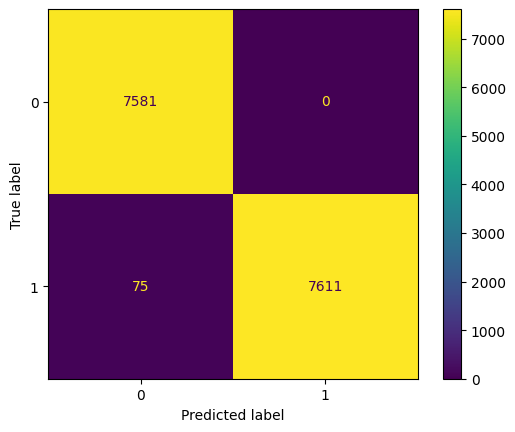

In [182]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_train, rf_pred_train)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.best_estimator_.classes_)

# Plot confusion matrix
print(cm)

# Display plot
disp.plot()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [173]:
# 1. Print your accuracy score.
accuracy = accuracy_score(y_train, rf_pred_train)
print(f"Accuaracy: {accuracy:.4f}")

# 2. Print your precision score.
precision = precision_score(y_train, rf_pred_train)
print(f"Precision: {precision:.4f}")

# 3. Print your recall score.
recall = recall_score(y_train, rf_pred_train)
print(f"Recall: {recall:.4f}")

# 4. Print your f1 score.
f1_score_model = f1_score(y_train, rf_pred_train)
print(f"F1 score: {f1_score_model:.4f}")

Accuaracy: 0.9951
Precision: 1.0000
Recall: 0.9902
F1 score: 0.9951


In [183]:
# Create classification report for random forest model
print(classification_report(y_train, rf_pred_train, digits=4))

              precision    recall  f1-score   support

           0     0.9902    1.0000    0.9951      7581
           1     1.0000    0.9902    0.9951      7686

    accuracy                         0.9951     15267
   macro avg     0.9951    0.9951    0.9951     15267
weighted avg     0.9951    0.9951    0.9951     15267



**Question:** What does your classification report show? What does the confusion matrix indicate?

    From this summary we can conclude that the model performance for predicting "claim" is precision 99.85% and  recall 95.99%  
    Hafmonic score f1 is equal 97.88%

    Averall accuracy of the model 97.91%

#### **XGBoost**

In [197]:
#Evaluate XGBoost model
xgb_pred_train = xgb1.best_estimator_.predict(X_train)

[[7581    0]
 [   0 7686]]


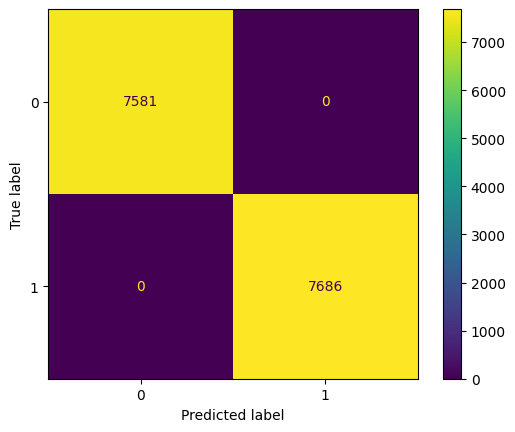

In [198]:
# Compute values for confusion matrix
cm2 = confusion_matrix(y_train, xgb_pred_train)

# Create display of confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=xgb1.best_estimator_.classes_)

# Plot confusion matrix
print(cm2)

# Display plot
disp2.plot()

In [199]:
# Create a classification report
print(classification_report(y_train, xgb_pred_train, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      7581
           1     1.0000    1.0000    1.0000      7686

    accuracy                         1.0000     15267
   macro avg     1.0000    1.0000    1.0000     15267
weighted avg     1.0000    1.0000    1.0000     15267



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

    From this summary we can conclude that the model performance for predicting "claim" is precision 99.76% and  recall 96.33%  
    Hafmonic score f1 is equal 98.01%

    Averall accuracy of the model 98.03%

    This model performs slightly better on the test data and will be chosen as a "champion" model

### **Use champion model to predict on test data**

In [186]:
xgb_pred_test = xgb1.best_estimator_.predict(X_test)

[[1891    4]
 [  18 1904]]


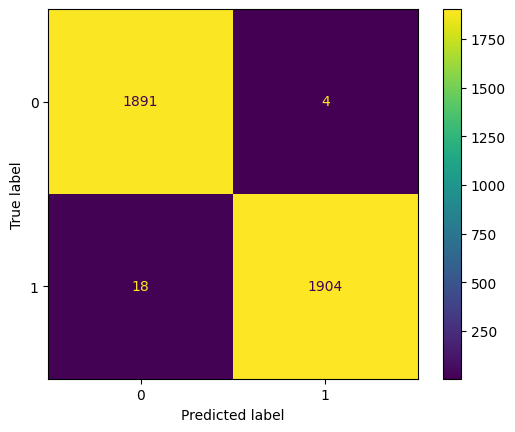

In [187]:
# Compute values for confusion matrix
cm3 = confusion_matrix(y_test, xgb_pred_test)

# Create display of confusion matrix
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=xgb1.best_estimator_.classes_)

# Plot confusion matrix
print(cm3)

# Display plot
disp3.plot();

In [188]:
# Create a classification report
print(classification_report(y_test, xgb_pred_test, digits=4))

              precision    recall  f1-score   support

           0     0.9906    0.9979    0.9942      1895
           1     0.9979    0.9906    0.9943      1922

    accuracy                         0.9942      3817
   macro avg     0.9942    0.9943    0.9942      3817
weighted avg     0.9943    0.9942    0.9942      3817



    TEST DATA:  
    From this summary we can conclude that the model performance for predicting "claim" on the test data is precision 99.66% and  recall 96.46%  
    Hafmonic score f1 is equal 98.04%

    Averall accuracy of the model 98.06%

#### **Feature importances of champion model**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

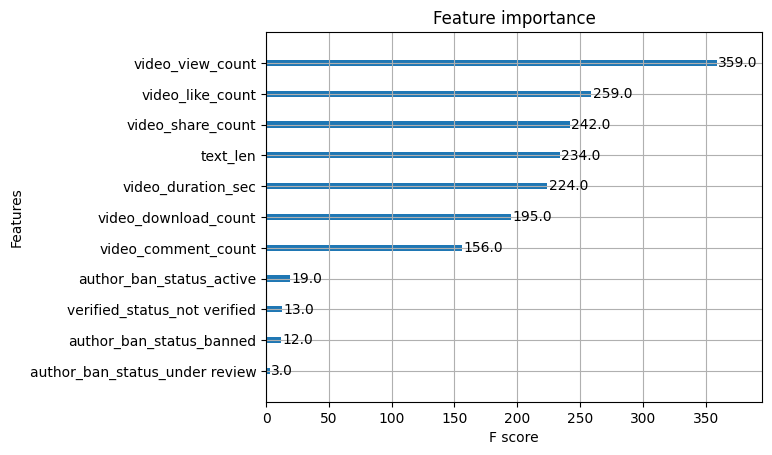

In [189]:
plot_importance(xgb1.best_estimator_)

**Question:** Describe your most predictive features. Were your results surprising?

    From precious activity we knew that huge amount of likes and views can point to "claim video"   
    Although we also thought that author ban status and verified status is quite important from the "claim" perspective, but this features are not even in top3

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

        Model performs very vel on  both train and test data with harmonic score f1 equal 99.42% on "claim" class    
        This model is recommended to use for prediction "claim" status as the wrong predictions is really low

2. **What was your model doing? Can you explain how it was making predictions?**

        Model is extreme using gradient boost algorythm. The decision is made based on features importance. The most influence featers are: "video_view_count", "video like count", "video share count", "length of the video_transcription_text" and "video duration" 

3. **Are there new features that you can engineer that might improve model performance?**

        Although the model performance is quite good, there is always place for improvement. It is worth to play with other features and see, if changing "video like count" for other feature corelated with this feature will improve the moedl performance even better.
        UPDATE - that was true - adding new entartainment feature improved model performance and made it reaaly good

4. **What features would you want to have that would likely improve the performance of your model?**

        We also can engineer new features based on video_transcription_text and see if we can improve our model